<p> Name: Omid Haghverdi <p>
<p> Qualification: Master's in Engineering <p> 
<p> University: La Sapienza Università di Roma <p> 
<p> Location: Rome, Italy <p> 
<p> This projects concerns the sales in video games <p>

In [1]:
# Importing the required libraries:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot

%matplotlib inline

# <center>Getting the Dataset</center>

In [2]:
df = pd.read_csv('VideoGameSales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EUR_Sales,JAP_Sales,IND_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
df.shape

(500, 11)

In [4]:
df.describe()

,Rank,Year,NA_Sales,EUR_Sales,JAP_Sales,IND_Sales,Global_Sales
count,500.000000,496.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,2005.092742,3.014580,1.916060,0.820980,0.600800,6.352300
std,144.481833,7.260761,3.415832,2.061512,1.321768,0.841739,6.146037
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,2.890000
25%,125.750000,2001.000000,1.540000,0.990000,0.040000,0.220000,3.500000
50%,250.500000,2007.000000,2.160000,1.405000,0.160000,0.410000,4.390000
75%,375.250000,2010.000000,3.242500,2.175000,1.035000,0.702500,6.590000
max,500.000000,2016.000000,41.490000,29.020000,10.220000,10.570000,82.740000


What can we understand from these numbers?

- These games were released between 1980 and 2016
- 500 games are in the dataframe
- If you pay attention to the mean and max of sales, maximum sale is much higher than the average.

# <center>Digging a little deeper</center>

In [5]:
print('The total number of games are:', len(df['Name'].unique()))
print('The total number of genre are:', len(df['Genre'].unique()))
print('The total number of publishers are:', len(df['Publisher'].unique()))

The total number of games are: 431
The total number of genre are: 12
The total number of publishers are: 34


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          500 non-null    int64  
 1   Name          500 non-null    object 
 2   Platform      500 non-null    object 
 3   Year          496 non-null    float64
 4   Genre         500 non-null    object 
 5   Publisher     499 non-null    object 
 6   NA_Sales      500 non-null    float64
 7   EUR_Sales     500 non-null    float64
 8   JAP_Sales     500 non-null    float64
 9   IND_Sales     500 non-null    float64
 10  Global_Sales  500 non-null    float64
dtypes: float64(6), int64(1), object(4)
memory usage: 43.1+ KB


As you can see 4 items from the 'year', and 1 item from the publisher are missing

# <center>Getting a few graphs</center>

In [7]:
df_sub = df[0:25]

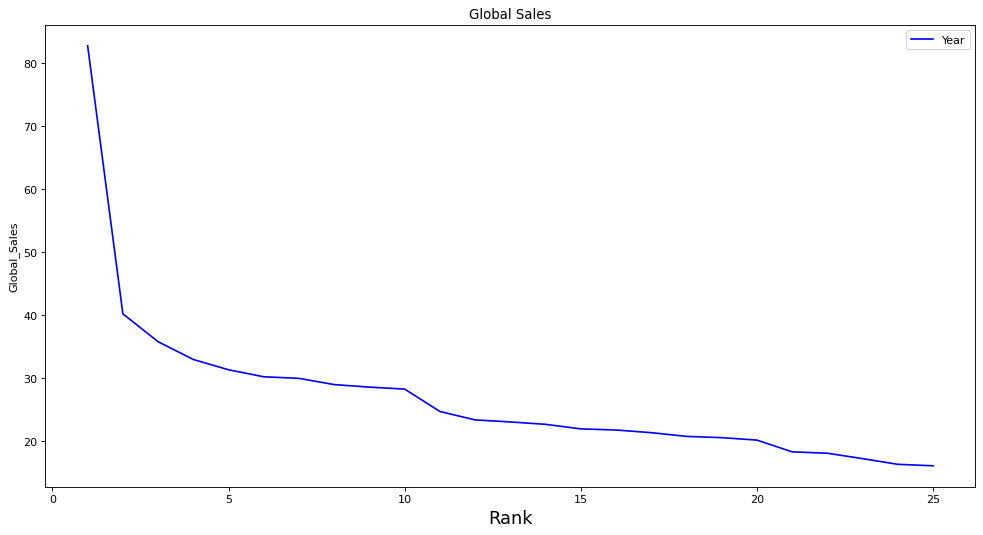

In [8]:
x = df_sub['Rank']
y = df_sub['Global_Sales']
plt.figure(figsize=(15,7.5), dpi= 80)
plt.plot(x,y, label = 'Year', color = 'blue')
plt.xlabel('Rank', fontsize=16)
plt.ylabel('Global_Sales')
plt.title('Global Sales')
plt.legend()
plt.show()

As expected

### Now let's see the distribution

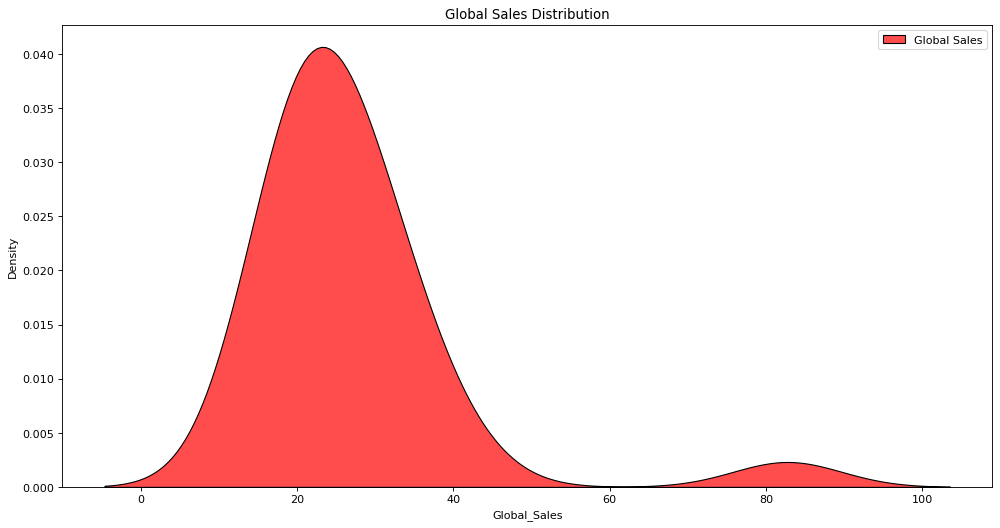

In [9]:
# I am going to show the distribution using KDEPlot from seaborn

plt.figure(figsize=(15,7.5), dpi= 80)
sns.kdeplot(data = df_sub, x = 'Global_Sales', shade=True, label = 'Global Sales', color="red", alpha=.7, edgecolor='black')

plt.title('Global Sales Distribution')
plt.legend()
plt.show()

In [10]:
total = df_sub['Global_Sales']
NA = df_sub['NA_Sales']
EUR = df_sub['EUR_Sales']
JAP = df_sub['JAP_Sales']
IND = df_sub['IND_Sales']

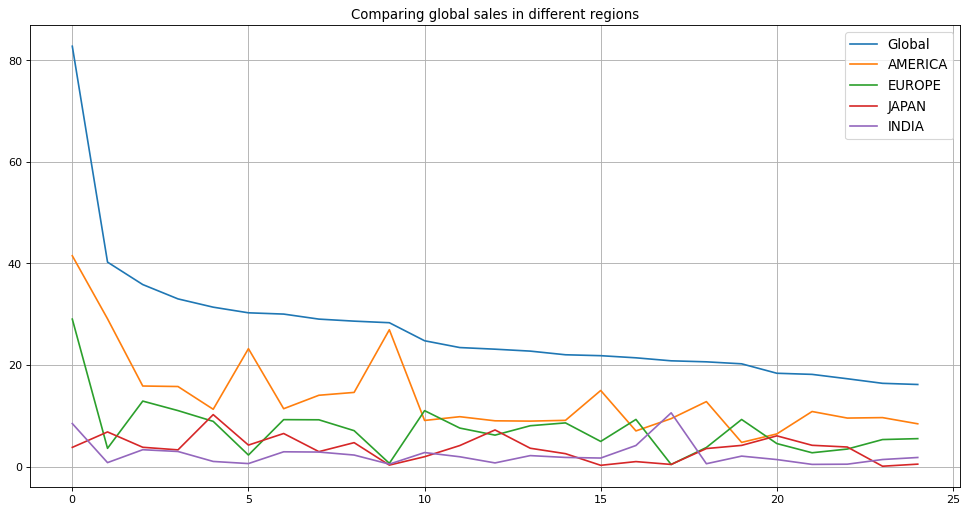

In [11]:
plt.figure(figsize=(15,7.5), dpi= 80)
plt.grid(True)
plt.title('Comparing global sales in different regions')

plt.plot(total, label = 'Global')
plt.plot(NA, label = 'AMERICA')
plt.plot(EUR, label = 'EUROPE')
plt.plot(JAP, label = 'JAPAN')
plt.plot(IND, label = 'INDIA')
plt.legend(fontsize='large')

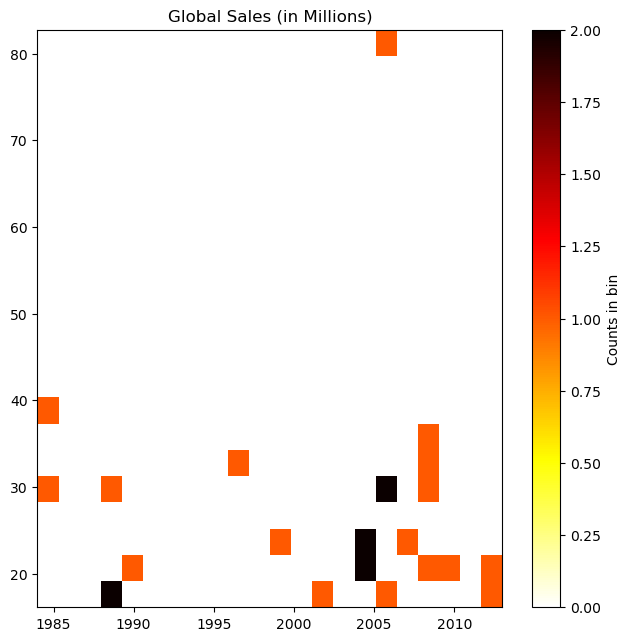

In [12]:
plt.figure(figsize=(7.5,7.5))
x = df_sub['Year']
y = df_sub['Global_Sales']
plt.title('Global Sales (in Millions)')
plt.hist2d(x, y, bins=22, cmap='hot_r')
cb = plt.colorbar()
cb.set_label('Counts in bin')

### Maximum games sold using Countplot method

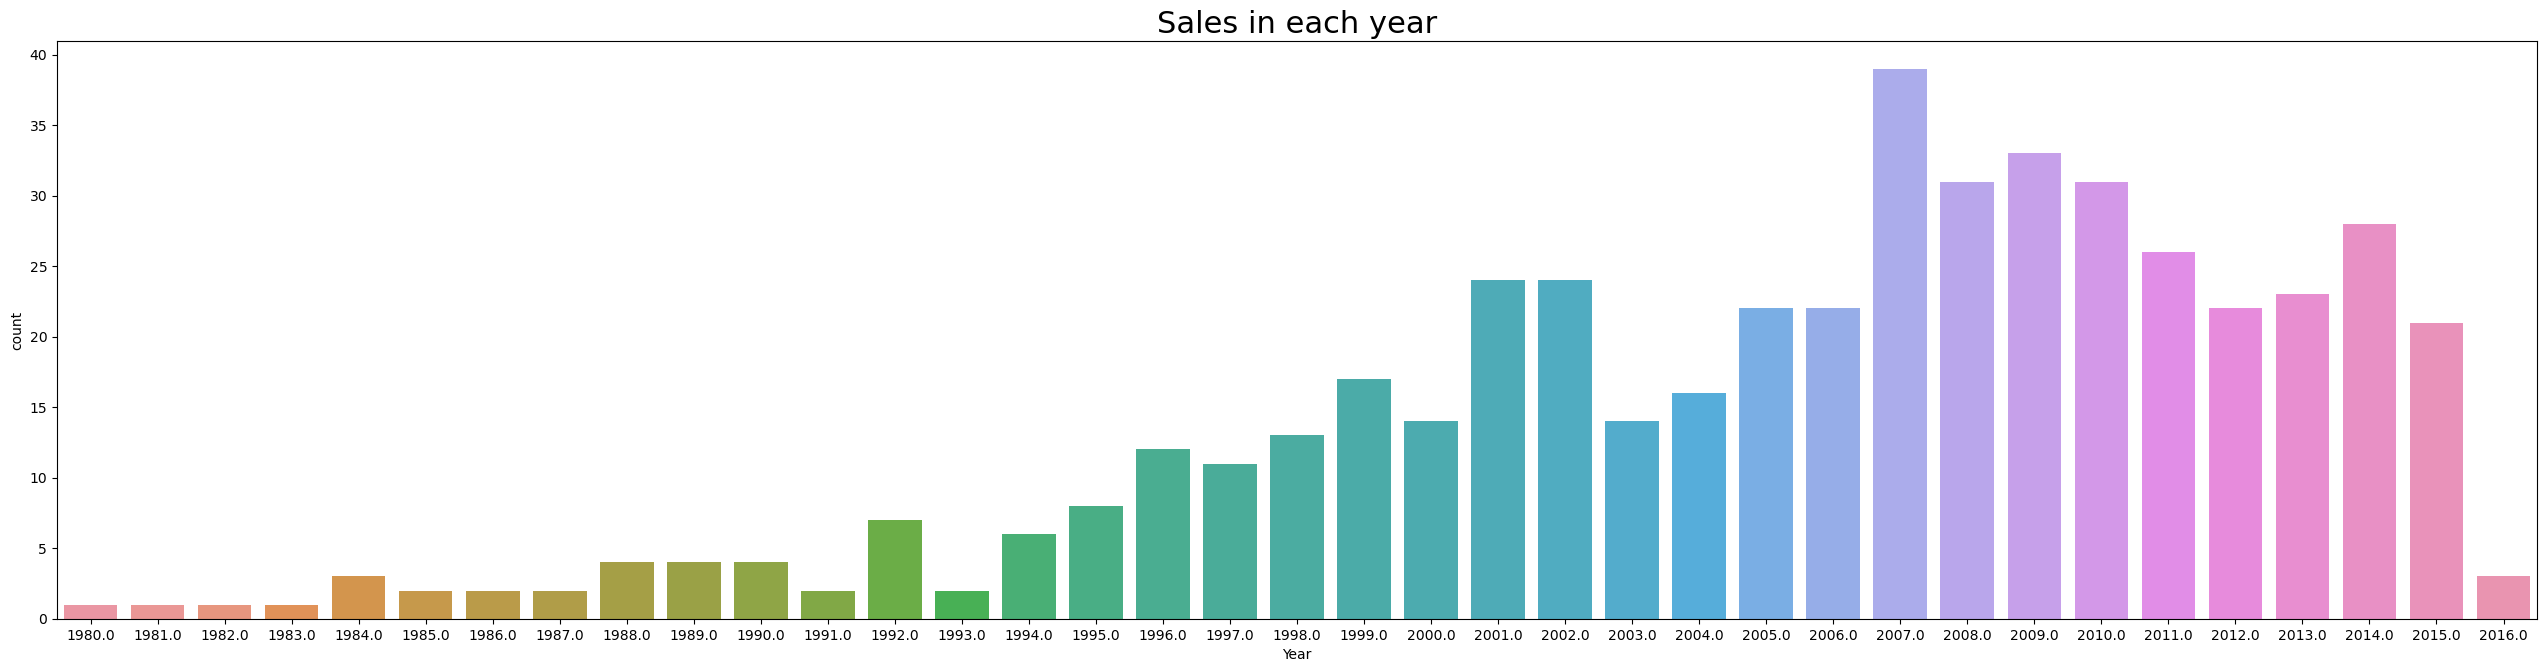

In [13]:
plt.figure(figsize=(32,7.5))
sns.countplot(data = df, x = 'Year')
plt.title('Sales in each year', fontsize=22)
plt.show()

### The Top Tens

In [14]:
TopTenpublishers_index = df.Publisher.value_counts().head(10).index
TopTenpublishers_values = df.Publisher.value_counts().head(10).values

TopTenpublishers = pd.DataFrame(list(zip(TopTenpublishers_index, TopTenpublishers_values)), 
                                columns =['TopTenpublishers_index', 'TopTenpublishers_values'])

In [15]:
TopTenpublishers

,TopTenpublishers_index,TopTenpublishers_values
0,Nintendo,141
1,Electronic Arts,66
2,Sony Computer Entertainment,52
3,Activision,45
4,Ubisoft,28
5,Take-Two Interactive,24
6,Microsoft Game Studios,22
7,Capcom,13
8,Konami Digital Entertainment,11
9,Sega,11


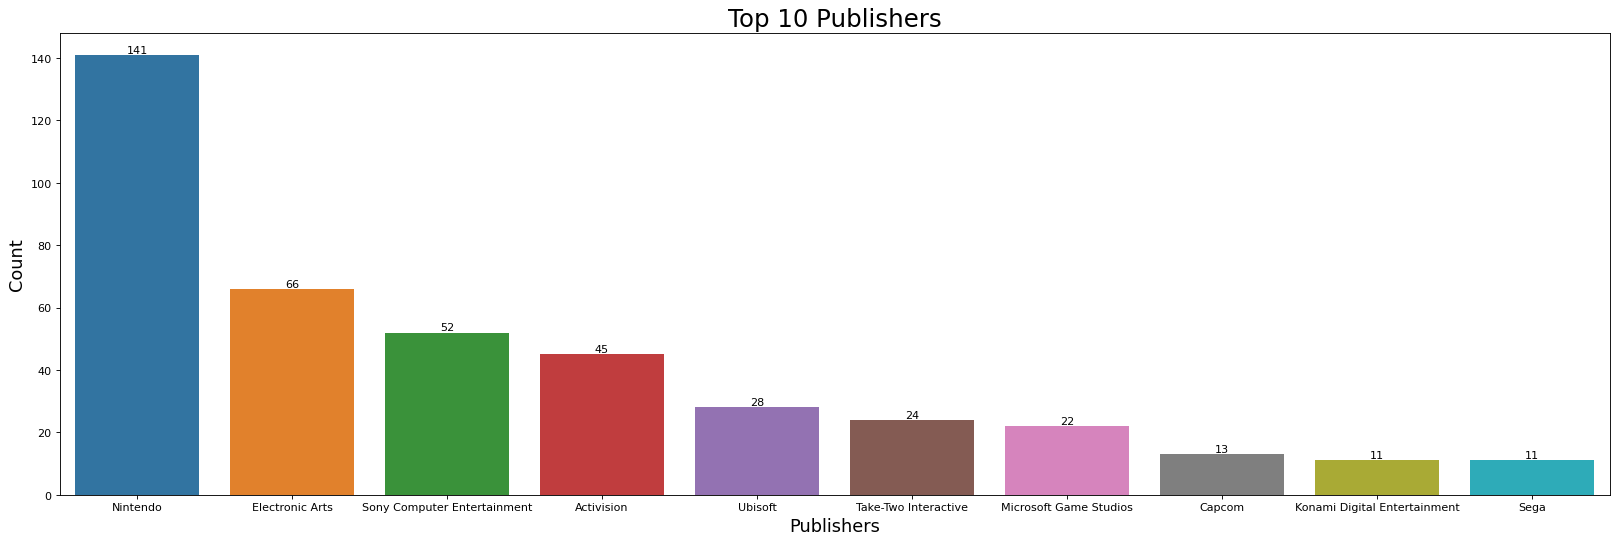

In [16]:
# Seaborn

plt.figure(figsize=(25,7.5), dpi=80)

ax = sns.barplot(data=TopTenpublishers, x = 'TopTenpublishers_index', y='TopTenpublishers_values')
plt.title('Top 10 Publishers',fontsize=22)
plt.xlabel('Publishers',fontsize=16)
plt.ylabel('Count',fontsize=16)
ax.bar_label(ax.containers[0]);

# Matplotlib

#plt.barh(TopTenpublishers_index,TopTenpublishers_values)
#for index, value in enumerate(TopTenpublishers_values):
#    plt.text(value, index, str(value))

In [17]:
TopTenplatforms_index = df.Platform.value_counts().head(10).index
TopTenplatforms_values = df.Platform.value_counts().head(10).values

TopTenplatforms = pd.DataFrame(list(zip(TopTenplatforms_index, TopTenplatforms_values)), 
                                columns =['TopTenplatforms_index', 'TopTenplatforms_values'])


topTenGenres_index = df.Genre.value_counts().head(10).index
topTenGenres_values = df.Genre.value_counts().head(10).values

topTenGenres = pd.DataFrame(list(zip(topTenGenres_index, topTenGenres_values)), 
                                columns =['topTenGenres_index', 'topTenGenres_values'])

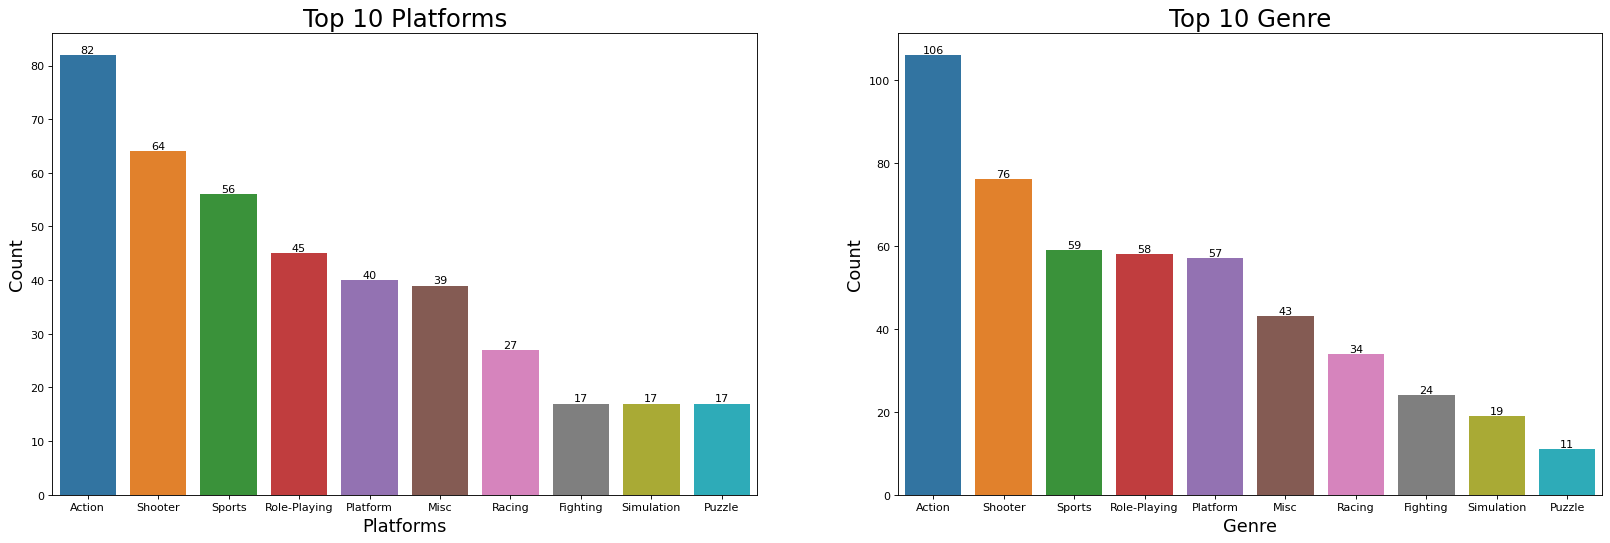

In [18]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(25,7.5), dpi=80)

ax0 = sns.barplot(ax=axes[0], data=TopTenplatforms, x = 'TopTenplatforms_index', y='TopTenplatforms_values')
ax0.set_title('Top 10 Platforms',fontsize=22)
ax0.set_xlabel('Platforms',fontsize=16)
ax0.set_ylabel('Count',fontsize=16)
ax0.bar_label(ax0.containers[0]);

ax1 = sns.barplot(ax=axes[1],data=topTenGenres, x = 'topTenGenres_index', y='topTenGenres_values')
ax1.set_title('Top 10 Genre',fontsize=22)
ax1.set_xlabel('Genre',fontsize=16)
ax1.set_ylabel('Count',fontsize=16)
ax1.bar_label(ax1.containers[0]);

* PS2 is the most popular platform.
* Action games are the most populare.
* Nintentdo seems to be ranking first among these publishers.

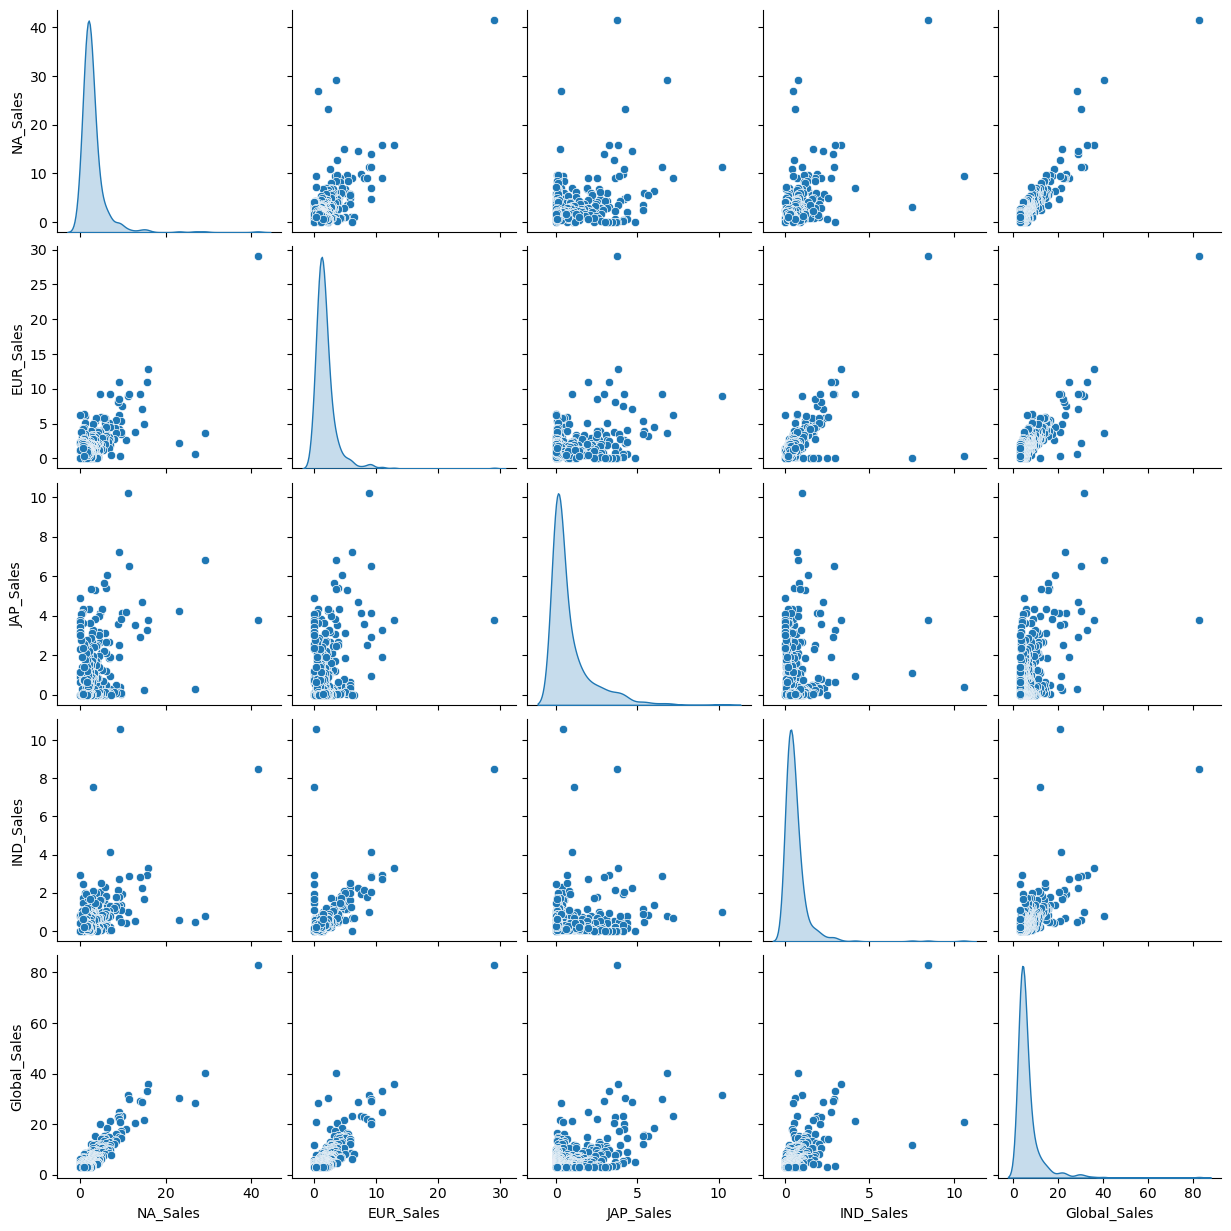

In [19]:
# Corellating among all Continents/Countries using Seaborn to perform pairplot and to plot the graph with matplotlib:

sns.pairplot(df.loc[0:,['NA_Sales','EUR_Sales','JAP_Sales', 'IND_Sales', 'Global_Sales']], diag_kind='kde')
plt.show()

United States and Europe have hugher correlation with the global sales

In [20]:
df.corr(method='pearson')

,Rank,Year,NA_Sales,EUR_Sales,JAP_Sales,IND_Sales,Global_Sales
Rank,1.000000,0.017608,-0.551209,-0.532704,-0.410322,-0.404958,-0.628676
Year,0.017608,1.000000,-0.157178,0.157495,-0.232970,0.210332,-0.055793
NA_Sales,-0.551209,-0.157178,1.000000,0.654039,0.365895,0.474504,0.918823
EUR_Sales,-0.532704,0.157495,0.654039,1.000000,0.330890,0.602196,0.852529
JAP_Sales,-0.410322,-0.232970,0.365895,0.330890,1.000000,0.118911,0.545679
IND_Sales,-0.404958,0.210332,0.474504,0.602196,0.118911,1.000000,0.628246
Global_Sales,-0.628676,-0.055793,0.918823,0.852529,0.545679,0.628246,1.000000


The two main regions are US and Europe and India is in the third place.

### Let's see how have the top 15 games acted in Europe

In [21]:
top15 = df.head(15)

In [22]:
top15

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EUR_Sales,JAP_Sales,IND_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


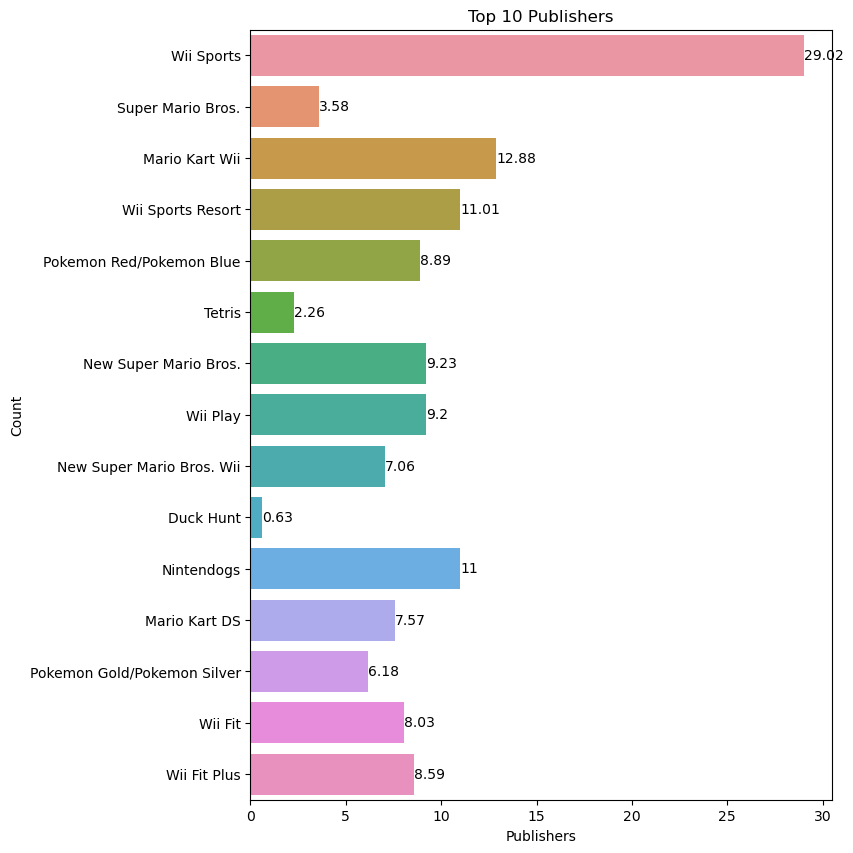

In [23]:
plt.figure(figsize=(7.5,10))

ax = sns.barplot(data=top15, x =top15['EUR_Sales'], y=top15['Name'])
ax.set_title('Top 10 Publishers')
ax.set_xlabel('Publishers')
ax.set_ylabel('Count')
ax.bar_label(ax.containers[0]);

### Video games sales between 2001 and 2016

In [32]:
year_count = [i for i in range(2001, 2016)]
count = df.loc[df['Year'].isin(year_count)]

ns = sum(count.NA_Sales) #Total sales in North America
print('North America: ',round(ns),'Millions')

es = sum(count.EUR_Sales) #Total sales in Europe
print('Europe: ',round(es),'Millions')

js = sum(count.JAP_Sales) #Total sales in Japan
print('Japan: ',round(js),'Millions')

ins = sum(count.IND_Sales) #Sales in India
print('India: ',round(ins),'Millions')

gs = sum(count.Global_Sales) #Global Sales
print('\nGlobal Sales: ',round(gs),'Millions')

North America:  1078 Millions
Europe:  781 Millions
Japan:  254 Millions
India:  272 Millions

Global Sales:  2385 Millions
